# Prohledáníní internetu a stahování dat

Je to několik kroků, knihoven které spolu musí spolupracovat:
1. `requests`: simulace prohlížeše a stažení dat v textu.

In [1]:
import requests

Budu se muset trochu zamaskovat: tak abych vypadal jako prohlížeč.
Například Firefox se představi serveru takto:

```
User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:83.0) Gecko/20100101 Firefox/83.0
```

In [2]:
USER_AGENT = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:83.0) Gecko/20100101 Firefox/83.0'}


Také nechceme dělat [DOS-attack](https://en.wikipedia.org/wiki/Denial-of-service_attack).
Proto omezím dotazy v čase.

In [3]:
import time

print("Printed immediately.")
time.sleep(2.4)
print("Printed after 2.4 seconds.")

Printed immediately.
Printed after 2.4 seconds.


Definice adresy:

klíčov jsou parametry adresy a dosazovní hnodnot do nich:

In [4]:
query = "datamining"
results = 100
lang = "en"

In [5]:
google_url = f"https://www.google.com/search?q={query}&num={results}&hl={lang}"
google_url

'https://www.google.com/search?q=datamining&num=100&hl=en'

Dalším krokem je odeslání dotazu:

In [6]:
response = requests.get(google_url, headers=USER_AGENT)
response.raise_for_status() # Kontrola že server odpovědel: OK
body = response.text
len(body)

552457

Teď mám u sebe v promenné 'body' uloženou odpověd ze serveru.

## Beautiful
materiály v dokumentu [beautiful-soup](beautiful-soup/readme.md)

In [7]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

Zpracu BS stažeou stránku:

In [8]:
soup = BeautifulSoup(body, 'html.parser')
soup.title.text

'datamining - Google Search'

Teď hledám konktérní elementy na stránce:

In [9]:
g = soup.select("div.g")
len(g)

102

In [10]:
g[0].h3.text

'Data Mining Definition - Investopedia'

In [11]:
for div in g:
    print(div.a["href"])

https://www.investopedia.com/terms/d/datamining.asp
https://www.investopedia.com/terms/d/datamining.asp
#
https://en.wikipedia.org/wiki/Data_mining
https://www.sas.com/en_us/insights/analytics/data-mining.html
https://economictimes.indiatimes.com/definition/data-mining
https://www.talend.com/resources/what-is-data-mining/
https://www.guru99.com/data-mining-tutorial.html
https://docs.oracle.com/cd/B28359_01/datamine.111/b28129/process.htm
https://www.iberdrola.com/innovation/data-mining-definition-examples-and-applications
https://www.britannica.com/technology/data-mining
https://searchsqlserver.techtarget.com/definition/data-mining
https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/data-mining
https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-mining
https://www.laits.utexas.edu/~norman/BUS.FOR/course.mat/Alex/
https://www.coursera.org/specializations/data-mining
https://www.javatpoint.com/data-mining
http://www.datamind.cz/cz/blog/Co-j

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(columns=["title", "link", "desciption"])
for div in g:
    row = {
        "title": div.h3.text if div.h3 is not None else None,
        "link": div.a["href"],
        "desciption": div.text
    }
    df = df.append(row, ignore_index=True)
df

title  \
0                Data Mining Definition - Investopedia   
1                Data Mining Definition - Investopedia   
2                                                 None   
3                              Data mining - Wikipedia   
4                           What is data mining? | SAS   
..                                                 ...   
97   Data Miners Inc. We wrote the book on data min...   
98   5 Uses for Data Mining - Computer Science Degr...   
99   Data Mining - Ryte Wiki - The Digital Marketin...   
100  What does “data mining” mean in digital analyt...   
101                                             Images   

                                                  link  \
0    https://www.investopedia.com/terms/d/dataminin...   
1    https://www.investopedia.com/terms/d/dataminin...   
2                                                    #   
3            https://en.wikipedia.org/wiki/Data_mining   
4    https://www.sas.com/en_us/insights/analytics/d...   
..                                                 ...   
97                         http://www.data-miners.com/   
98   https://www.computersciencedegreehub.com/lists...   
99                https://en.ryte.com/wiki/Data_Mining   
100  https://www.atinternet.com/en/glossary/data-mi...   
101  /search?q=datamining&num=100&hl=en&tbm=isch&so...   

                                            desciption  
0    Featured snippet from the webData mining is a ...  
1    Data Mining Definition - Investopediawww.inves...  
2    People also askWhat does data mining mean?What...  
3    Web resultsData mining - Wikipediaen.wikipedia...  
4    What is data mining? | SASwww.sas.com › SAS In...  
..                                                 ...  
97   Data Miners Inc. We wrote the book on data min...  
98   5 Uses for Data Mining - Computer Science Degr...  
99   Data Mining - Ryte Wiki - The Digital Marketin...  
100  What does “data mining” mean in digital analyt...  
101  ImagesMore imagesData miningDescriptionDescrip...  

[102 rows x 3 columns]

In [14]:
df["domain"] = df["link"].str.extract(r"https?://.*\.(\w+\.\w+)/")
df

title  \
0                Data Mining Definition - Investopedia   
1                Data Mining Definition - Investopedia   
2                                                 None   
3                              Data mining - Wikipedia   
4                           What is data mining? | SAS   
..                                                 ...   
97   Data Miners Inc. We wrote the book on data min...   
98   5 Uses for Data Mining - Computer Science Degr...   
99   Data Mining - Ryte Wiki - The Digital Marketin...   
100  What does “data mining” mean in digital analyt...   
101                                             Images   

                                                  link  \
0    https://www.investopedia.com/terms/d/dataminin...   
1    https://www.investopedia.com/terms/d/dataminin...   
2                                                    #   
3            https://en.wikipedia.org/wiki/Data_mining   
4    https://www.sas.com/en_us/insights/analytics/d...   
..                                                 ...   
97                         http://www.data-miners.com/   
98   https://www.computersciencedegreehub.com/lists...   
99                https://en.ryte.com/wiki/Data_Mining   
100  https://www.atinternet.com/en/glossary/data-mi...   
101  /search?q=datamining&num=100&hl=en&tbm=isch&so...   

                                            desciption  \
0    Featured snippet from the webData mining is a ...   
1    Data Mining Definition - Investopediawww.inves...   
2    People also askWhat does data mining mean?What...   
3    Web resultsData mining - Wikipediaen.wikipedia...   
4    What is data mining? | SASwww.sas.com › SAS In...   
..                                                 ...   
97   Data Miners Inc. We wrote the book on data min...   
98   5 Uses for Data Mining - Computer Science Degr...   
99   Data Mining - Ryte Wiki - The Digital Marketin...   
100  What does “data mining” mean in digital analyt...   
101  ImagesMore imagesData miningDescriptionDescrip...   

                           domain  
0                investopedia.com  
1                investopedia.com  
2                             NaN  
3                   wikipedia.org  
4                         sas.com  
..                            ...  
97                            NaN  
98   computersciencedegreehub.com  
99                       ryte.com  
100                atinternet.com  
101                           NaN  

[102 rows x 4 columns]

In [15]:
df_group = df.groupby(by="domain").count()
df_group

title  link  desciption
domain                                 
ac.nz               1     1           1
ac.uk               1     1           1
amazon.com          1     1           1
atinternet.com      1     1           1
biolab.si           1     1           1
...               ...   ...         ...
utexas.edu          1     1           1
wikicfp.com         1     1           1
wikipedia.org       1     1           1
wiktionary.org      1     1           1
wiley.com           1     1           1

[79 rows x 3 columns]

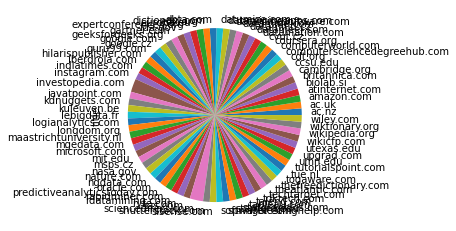

In [16]:
df_group["title"].plot.pie()

In [18]:
df.to_pickle("google-search-dataminig.dataframe.pkl")